# Import data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\justi\OneDrive\Documents\Career foundry\Data Immersion 4'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_profile.pkl'))

In [5]:
df.columns

Index(['order_id', 'user_id', 'order_num_of_customer', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_hours', 'max_order', 'loyalty_flag',
       'purchase_price', 'spending_flag', 'median_purchase', 'order_fr_flag',
       'first_name', 'last name', 'sex', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'region', 'exclusion_loc',
       'age_group', 'income_group', 'department', 'dependent_type',
       'parental_age', '18-29', 'family_type'],
      dtype='object')

# Distribution of Profiles

Text(0.5, 0, 'Income Group')

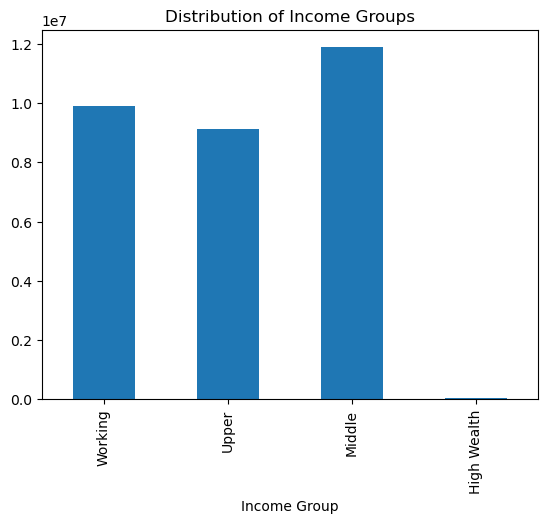

In [52]:
# Income group distribution bar
income_group_dist = df['income_group'].value_counts().sort_index(ascending=False).plot.bar()
plt.title("Distribution of Income Groups")
plt.xlabel("Income Group")

Text(0.5, 0, 'Family Type')

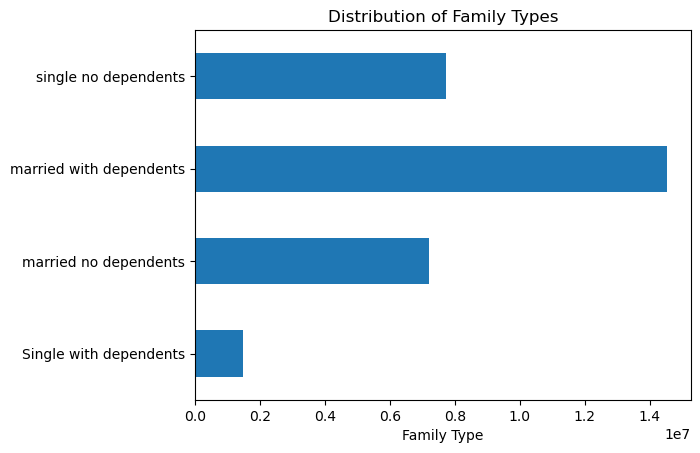

In [53]:
# Family type distribution bar
family_type_dist = df['family_type'].value_counts().sort_index().plot.barh()
plt.title("Distribution of Family Types")
plt.xlabel("Family Type")

Text(0, 0.5, 'Number of Orders')

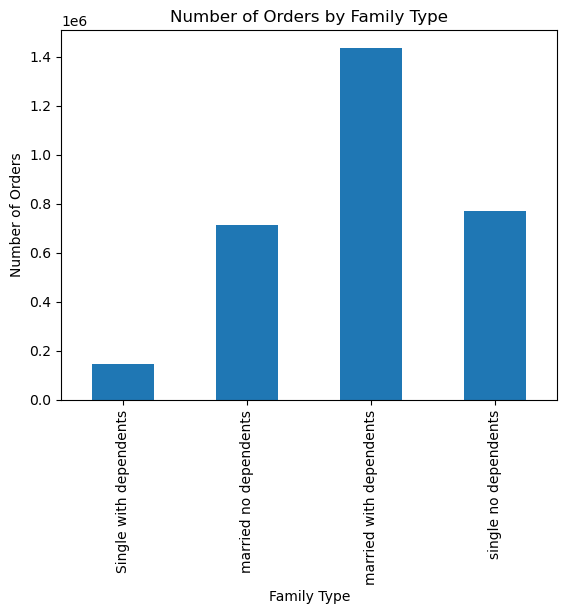

In [15]:
# Number of orders by family type bar
family_order_bar = df.groupby('family_type')['order_id'].nunique().sort_index().plot.bar()
plt.title("Number of Orders by Family Type")
plt.xlabel("Family Type")
plt.ylabel("Number of Orders")

Text(0.5, 0, 'Regions')

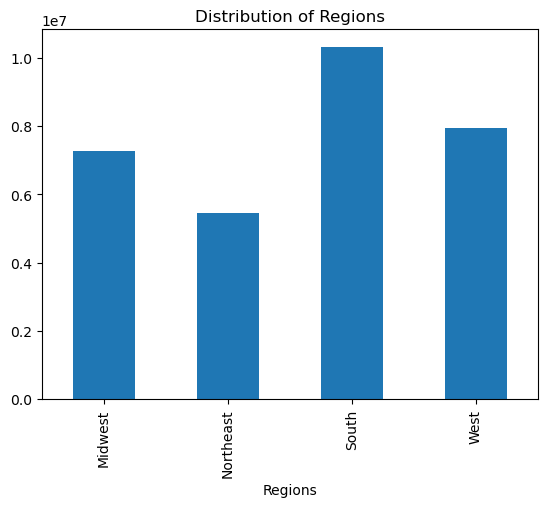

In [16]:
# Regions distribution bar
regional_dist = df['region'].value_counts().sort_index().plot.bar()
plt.title("Distribution of Regions")
plt.xlabel("Regions")

Text(0.5, 0, 'Age Group')

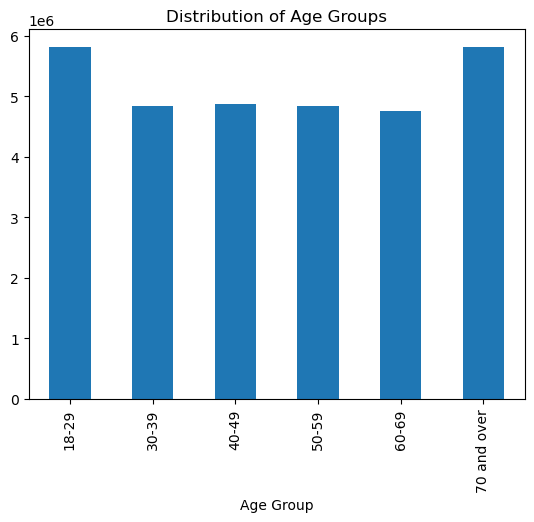

In [17]:
# Age group distribution bar
age_group_dist = df['age_group'].value_counts().sort_index().plot.bar()
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")

Text(0, 0.5, 'Number of Orders')

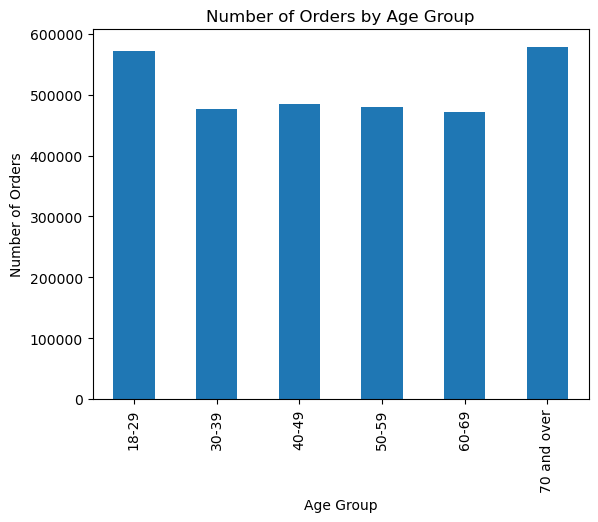

In [54]:
# number of orders by age group bar
order_counts_by_age = df.groupby('age_group')['order_id'].nunique().plot.bar()
plt.title("Number of Orders by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Orders")

In [22]:
# Save visuals as png
income_group_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_dist.png'))
family_type_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_type_dist.png'))
family_order_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_family_type.png'))
regional_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regional_dist.png'))
age_group_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_dist.png'))
order_counts_by_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_age.png'))

# Profiles by region and department

In [25]:
# create crosstab for income group and region
region_income = pd.crosstab(df['income_group'],df['region'], dropna = False)

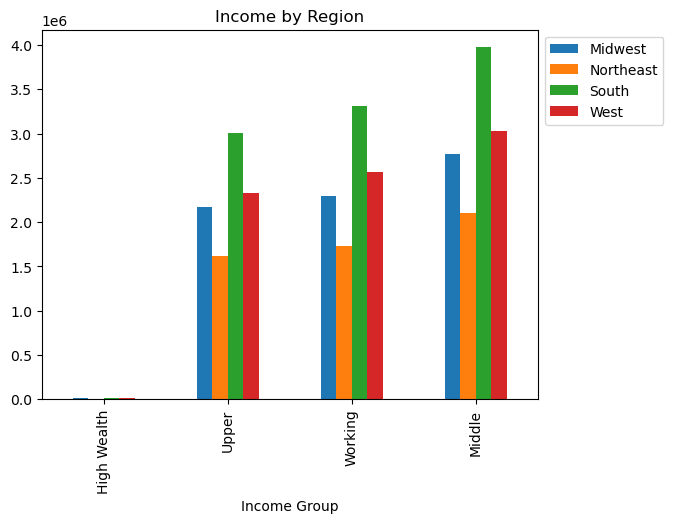

In [26]:
# Income by region bar
income_by_region_bar = region_income.sort_values(by=['West'], ascending=True).plot.bar()
plt.title("Income by Region")
plt.xlabel("Income Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [28]:
# Create crosstab for family type and region
region_family = pd.crosstab(df['family_type'],df['region'], dropna = False)

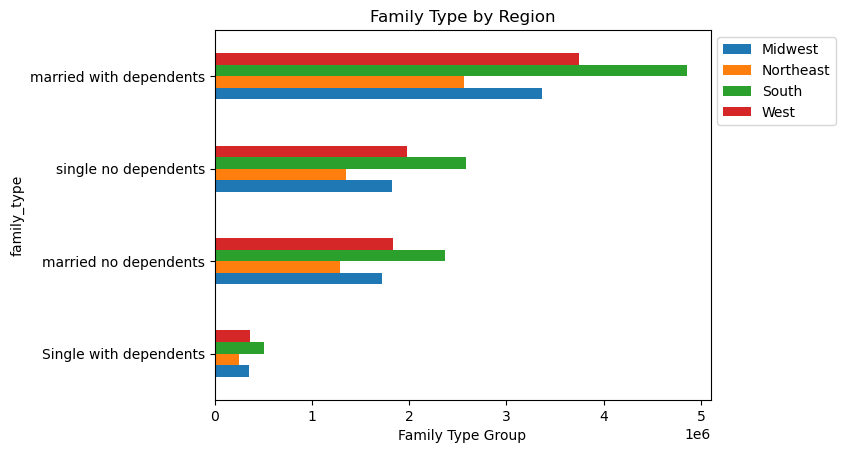

In [29]:
# Family type by region bar
fam_by_region_bar = region_family.sort_values(by=['West'], ascending=True).plot.barh()
plt.title("Family Type by Region")
plt.xlabel("Family Type Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [31]:
# Crosstab by age group and region
region_age = pd.crosstab(df['age_group'],df['region'], dropna = False)

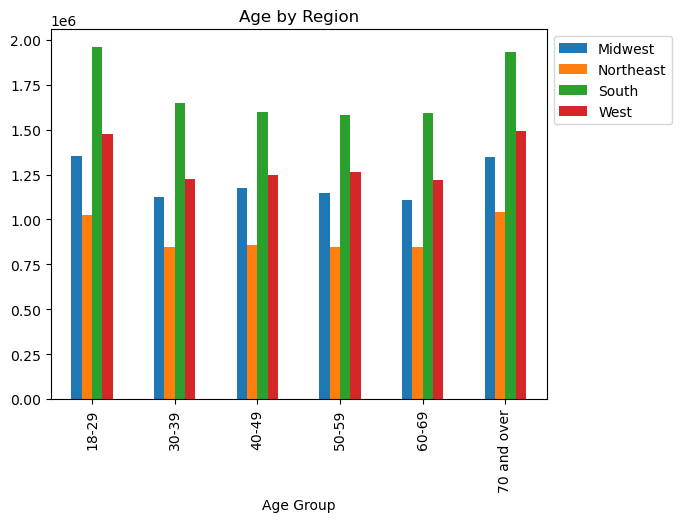

In [32]:
# Age by region bar
age_region_bar = region_age.plot.bar()
plt.title("Age by Region")
plt.xlabel("Age Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [33]:
# Crosstab for department and age group
dep_by_age = pd.crosstab(df['department'],df['age_group'], dropna = False)

Text(0.5, 1.0, 'Department Purchasing by Age Group')

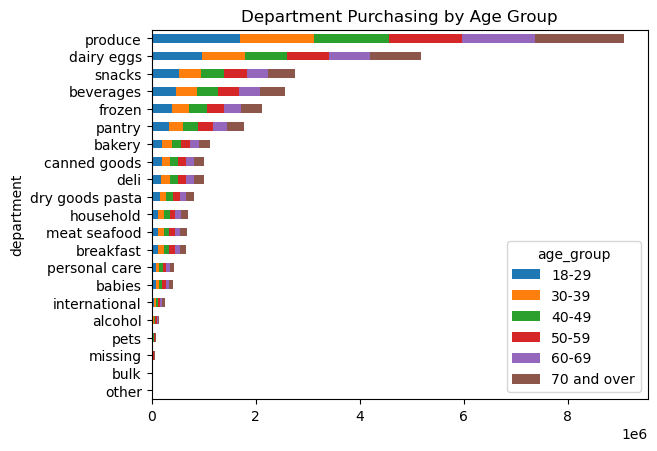

In [34]:
# Department purchasing by age group bar
dep_by_age_bar = dep_by_age.sort_values(by=['70 and over'], ascending=True).plot.barh(stacked = True)
plt.title("Department Purchasing by Age Group")

In [35]:
# Crosstab by department and income group
dep_by_income = pd.crosstab(df['department'],df['income_group'], dropna = False)

Text(0.5, 1.0, 'Department Purchasing by Income Group')

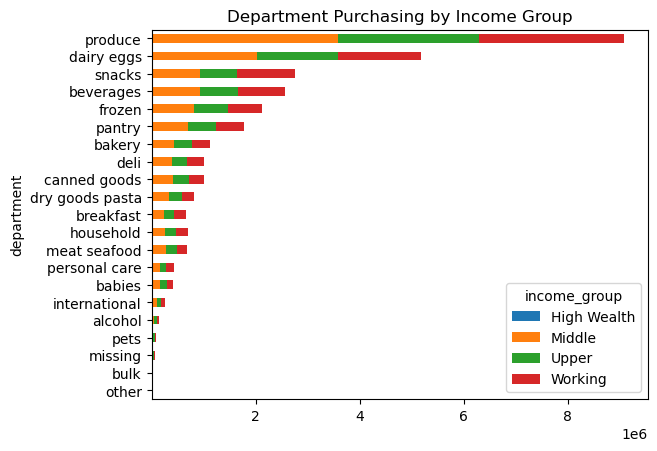

In [36]:
# Department purchasing by income group
dep_by_income_bar = dep_by_income.sort_values(by=['Working'], ascending=True).plot.barh(stacked = True)
plt.title("Department Purchasing by Income Group")

In [37]:
# Crosstab fo rdepartment and family type
dep_by_fam_type = pd.crosstab(df['department'],df['family_type'], dropna = False)

Text(0.5, 1.0, 'Department Purchasing by Family Type')

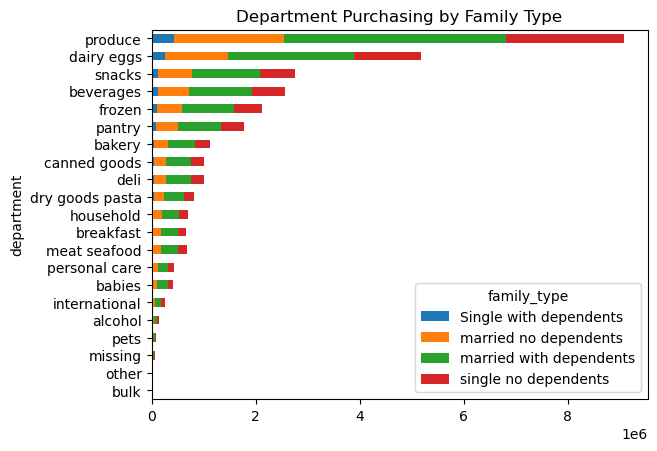

In [38]:
# Department purchasing by family type bar
dep_by_fam_type_bar = dep_by_fam_type.sort_values(by=['Single with dependents'], ascending=True).plot.barh(stacked = True)
plt.title("Department Purchasing by Family Type")

In [39]:
# crosstab by department and region
reg_dep_purch = pd.crosstab(df['department'],df['region'], dropna = False)

Text(0.5, 1.0, 'Department Purchasing by Region')

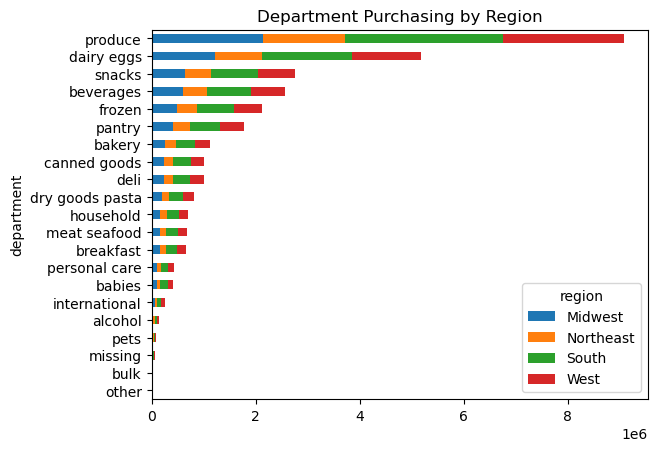

In [40]:
# department purchasing by region bar
reg_dep_purch = reg_dep_purch.sort_values(by=['West'], ascending=True).plot.barh(stacked=True)
plt.title("Department Purchasing by Region")

In [41]:
# Create pivot table for age group family status and order day of week
pivot_table = pd.pivot_table(df, values='order_id', index=['age_group', 'fam_status'], columns='orders_day_of_week', aggfunc='count')

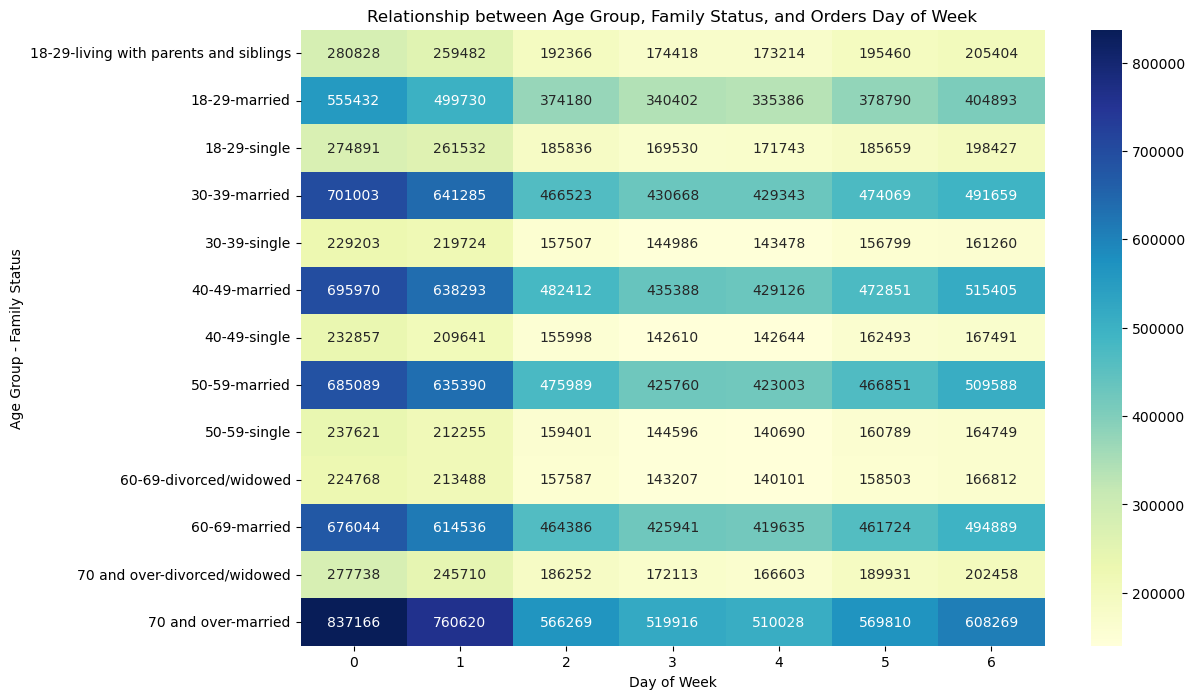

In [42]:
plt.figure(figsize=(12, 8))
heatmap_age_fam_dow = sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.title('Relationship between Age Group, Family Status, and Orders Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Age Group - Family Status')
plt.show()

In [43]:
# group fam status and order id
fam_order_counts = df.groupby('fam_status')['order_id'].nunique()

Text(0, 0.5, 'Number of Orders')

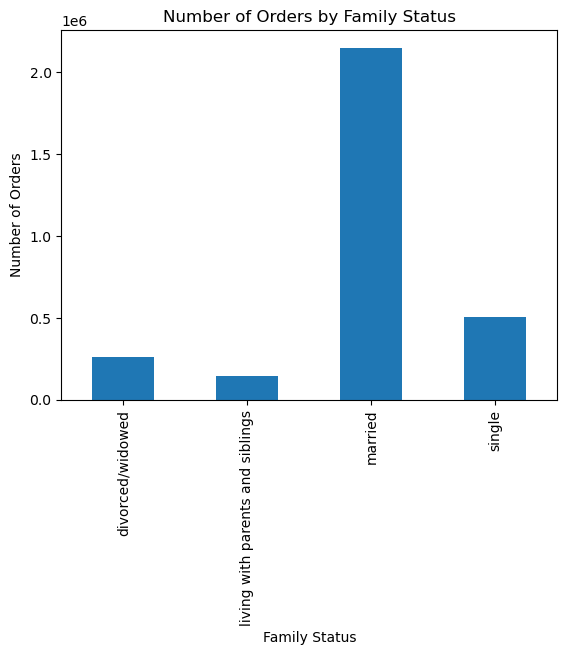

In [44]:
# orders by family status bar
order_counts_by_fam = fam_order_counts.plot.bar()
plt.title("Number of Orders by Family Status")
plt.xlabel("Family Status")
plt.ylabel("Number of Orders")

Text(0, 0.5, 'Orders')

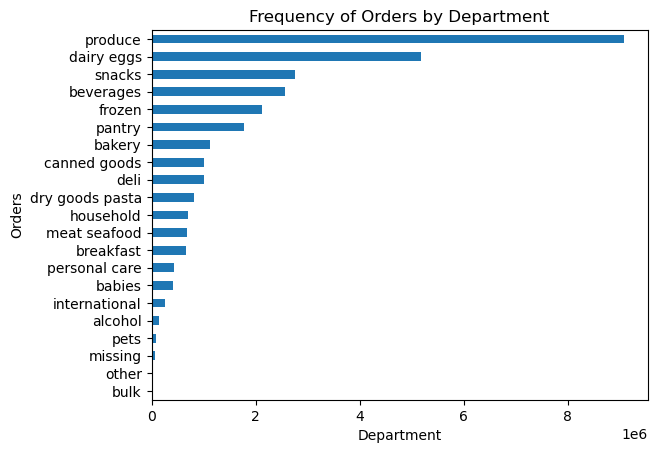

In [46]:
# order frequency by department 
dep_ord_freq = df['department'].value_counts().sort_values(ascending=True).plot.barh()
plt.title("Frequency of Orders by Department")
plt.xlabel("Department")
plt.ylabel("Orders")

In [47]:
# Save charts as png
income_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_by_region_bar.png'))
fam_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_by_region_bar.png'))
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_by_region_bar.png'))
dep_by_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_by_age_bar.png'))
dep_by_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_by_income_bar.png'))
dep_by_fam_type_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_by_fam_type_bar.png'))
reg_dep_purch.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'reg_dep_purch.png'))
heatmap_age_fam_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_age_fam_dow.png'))
order_counts_by_fam.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_counts_by_fam.png'))
dep_ord_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dep_ord_freq.png'))